Chapter 02

# 矩阵转置
《线性代数》 | 鸢尾花书：数学不难

这段代码的核心是对一个随机整数矩阵 $A$ 进行转置操作，并使用 `seaborn.heatmap` 进行可视化，以直观展示数据的结构及其变化。以下是详细的数学分析：

### **1. 矩阵 $A$ 的初始化**
代码首先使用 `numpy` 生成一个 $5 \times 12$ 的随机整数矩阵 $A$，其中元素的取值范围是 $[0,9]$：
\[
A = \begin{bmatrix} 
a_{11} & a_{12} & \dots & a_{1,12} \\ 
a_{21} & a_{22} & \dots & a_{2,12} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{51} & a_{52} & \dots & a_{5,12} 
\end{bmatrix}
\]
其中 $a_{ij} \in \mathbb{Z}, \quad 0 \leq a_{ij} \leq 9$。

代码使用 `np.random.seed(88)` 确保每次运行时 $A$ 的内容保持一致。然后利用 `seaborn.heatmap` 进行可视化，`cmap='RdYlBu_r'` 设置了颜色映射，使得数值较小的元素偏蓝色，数值较大的元素偏红色。

### **2. 矩阵的转置**
矩阵 $A$ 的转置 $A^T$ 是交换行列索引得到的矩阵：
\[
A^T = \begin{bmatrix} 
a_{11} & a_{21} & \dots & a_{51} \\ 
a_{12} & a_{22} & \dots & a_{52} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{1,12} & a_{2,12} & \dots & a_{5,12} 
\end{bmatrix}
\]
其形状从 $5 \times 12$ 变为 $12 \times 5$。代码 `A_T = A.T` 完成这个操作，并再次使用 `seaborn.heatmap` 进行可视化。

### **3. 行向量的提取及转置**
代码通过 `A[[i],:]` 提取第 $i$ 行（即形状保持为 $1 \times 12$），然后通过 `.T` 进行转置，得到形状为 $12 \times 1$ 的列向量：
\[
A[i,:] =
\begin{bmatrix} a_{i1} & a_{i2} & \dots & a_{i,12} \end{bmatrix}
\]
转置后变为：
\[
A[i,:]^T =
\begin{bmatrix} a_{i1} \\ a_{i2} \\ \vdots \\ a_{i,12} \end{bmatrix}
\]
可视化展示了这些行向量的不同表现形式。

### **4. 列向量的提取及转置**
代码通过 `A[:,[j]]` 提取矩阵的第 $j$ 列，生成形状为 $5 \times 1$ 的矩阵：
\[
A[:, j] =
\begin{bmatrix} a_{1j} \\ a_{2j} \\ \vdots \\ a_{5j} \end{bmatrix}
\]
转置后得到 $1 \times 5$ 的行向量：
\[
A[:, j]^T =
\begin{bmatrix} a_{1j} & a_{2j} & \dots & a_{5j} \end{bmatrix}
\]
代码依次对不同的列执行此操作，并使用 `seaborn.heatmap` 进行可视化。

### **5. 主要数学性质**
1. **转置的性质**
   - $(A^T)^T = A$
   - $(A + B)^T = A^T + B^T$
   - $(AB)^T = B^T A^T$（适用于可乘矩阵）

2. **矩阵索引**
   - $A[i,:]$ 提取第 $i$ 行，形状保持为 $1 \times n$。
   - $A[:,j]$ 提取第 $j$ 列，形状保持为 $m \times 1$。
   - 转置后行变列，列变行。

### **6. 可视化的作用**
使用 `seaborn.heatmap` 显示矩阵数据，使数据的模式和结构更加直观，特别是矩阵转置前后的形态变化。由于 `annot=True`，图中的每个单元格都会显示其具体的数值，以便观察不同数值的分布情况。

### **总结**
这段代码主要演示了：
- 生成一个 $5 \times 12$ 的随机整数矩阵；
- 计算其转置，并对比原矩阵和转置矩阵的结构；
- 提取不同的行向量和列向量，并研究它们的转置特性；
- 通过 `seaborn.heatmap` 进行可视化，增强数据的直观理解。

整体上，这是一组用于研究矩阵转置及其可视化方法的代码示例，在数据科学和线性代数学习中非常有价值。

## 初始化

In [6]:
import numpy as np
import seaborn as sns

In [7]:
np.random.seed(88)  # 保证每次运行生成相同的随机数
A = np.random.randint(0, 10, (5, 12))
A

array([[8, 0, 1, 4, 5, 1, 0, 5, 0, 2, 1, 4],
       [7, 9, 7, 7, 6, 6, 3, 1, 0, 8, 6, 0],
       [0, 5, 7, 5, 3, 9, 5, 3, 7, 3, 9, 3],
       [8, 5, 0, 6, 4, 0, 2, 2, 5, 9, 2, 5],
       [6, 6, 1, 1, 8, 6, 1, 2, 1, 7, 4, 3]])

<Axes: >

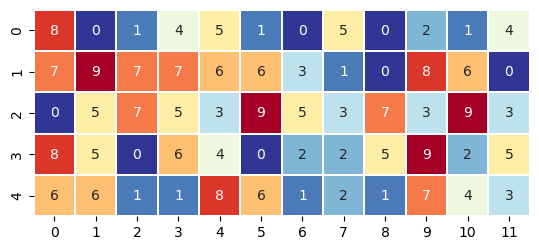

In [10]:
sns.heatmap(A, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

## 计算矩阵 A 的转置

In [12]:
A_T = A.T
A_T

array([[8, 7, 0, 8, 6],
       [0, 9, 5, 5, 6],
       [1, 7, 7, 0, 1],
       [4, 7, 5, 6, 1],
       [5, 6, 3, 4, 8],
       [1, 6, 9, 0, 6],
       [0, 3, 5, 2, 1],
       [5, 1, 3, 2, 2],
       [0, 0, 7, 5, 1],
       [2, 8, 3, 9, 7],
       [1, 6, 9, 2, 4],
       [4, 0, 3, 5, 3]])

<Axes: >

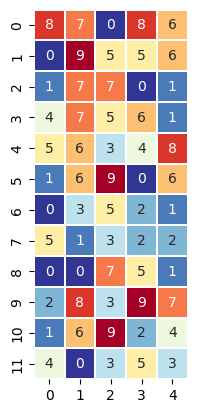

In [14]:
sns.heatmap(A_T, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

## 行向量的转置

In [16]:
A[[0],:]

array([[8, 0, 1, 4, 5, 1, 0, 5, 0, 2, 1, 4]])

<Axes: >

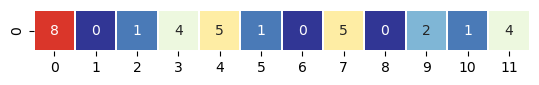

In [18]:
sns.heatmap(A[[0],:], cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

<Axes: >

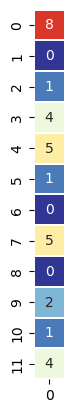

In [20]:
sns.heatmap(A[[0],:].T, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

In [22]:
A[[1],:]

array([[7, 9, 7, 7, 6, 6, 3, 1, 0, 8, 6, 0]])

<Axes: >

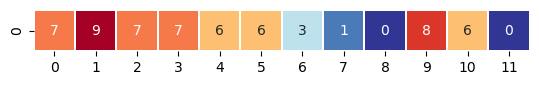

In [24]:
sns.heatmap(A[[1],:], cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

In [26]:
A[[-1],:]

array([[6, 6, 1, 1, 8, 6, 1, 2, 1, 7, 4, 3]])

<Axes: >

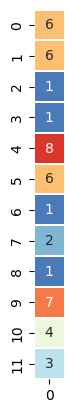

In [28]:
sns.heatmap(A[[-1],:].T, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

## 列向量的转置

In [30]:
A[:,[0]]

array([[8],
       [7],
       [0],
       [8],
       [6]])

<Axes: >

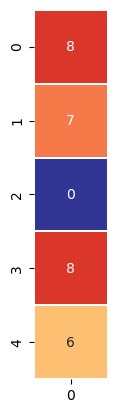

In [34]:
sns.heatmap(A[:,[0]], cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

<Axes: >

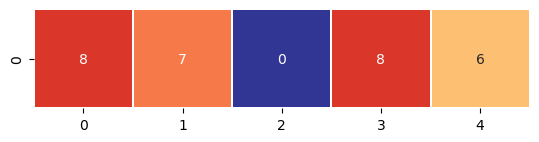

In [36]:
sns.heatmap(A[:,[0]].T, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

In [38]:
A[:,[1]]

array([[0],
       [9],
       [5],
       [5],
       [6]])

<Axes: >

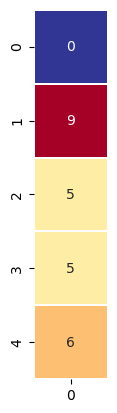

In [40]:
sns.heatmap(A[:,[1]], cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

<Axes: >

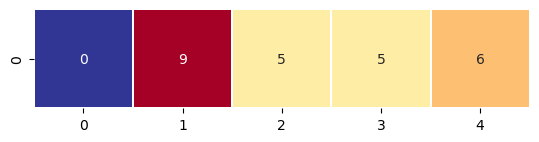

In [42]:
sns.heatmap(A[:,[1]].T, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

In [44]:
A[:,[7]]

array([[5],
       [1],
       [3],
       [2],
       [2]])

<Axes: >

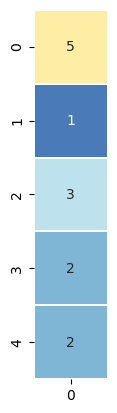

In [46]:
sns.heatmap(A[:,[7]], cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

<Axes: >

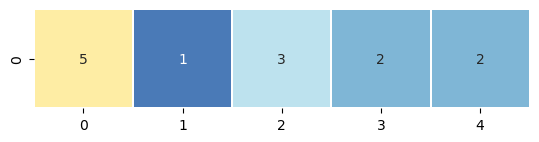

In [48]:
sns.heatmap(A[:,[7]].T, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

In [50]:
A[:,[-1]]

array([[4],
       [0],
       [3],
       [5],
       [3]])

<Axes: >

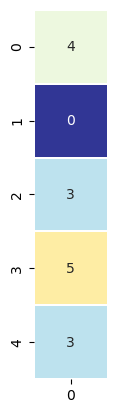

In [54]:
sns.heatmap(A[:,[-1]], cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

<Axes: >

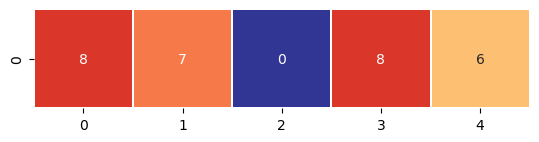

In [56]:
sns.heatmap(A[:,[0]].T, cmap = 'RdYlBu_r', square = True, 
            cbar = False, annot = True, vmin = 0, vmax = 9,
            linecolor = 'w', linewidths = 0.25)

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  